# Chapter 3: Functions and Numerical Methods

## Black body radiation

### Stefan-Boltzmann law

Definition of a Python function:

In [8]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install astropy

Note: you may need to restart the kernel to use updated packages.


In [10]:
from math import pi
from scipy.constants import sigma # Stefan-Boltzmann constant

def luminosity(R, Teff):
    """
    computes luminosity of a star 
    using the Stefan-Boltzmann law

    args: R - radius in m
          Teff - effective temperature in K

    returns: luminosity in W
    """
    A = 4*pi*R**2 # local variable for surface area
    return A * sigma * Teff**4

In [11]:
help(luminosity)

Help on function luminosity in module __main__:

luminosity(R, Teff)
    computes luminosity of a star 
    using the Stefan-Boltzmann law
    
    args: R - radius in m
          Teff - effective temperature in K
    
    returns: luminosity in W



Example: luminosity of the Sun

In [12]:
from astropy.constants import R_sun, L_sun

Teff_sun = 5778 # effective temperature of the Sun in K

print("Solar luminosity:")

# compute luminosity of the Sun
L_sun_sb = luminosity(R_sun.value, 5778)
print("\t{:.3e} W (Stefan-Boltzmann law)".format(L_sun_sb))

# solar luminosity from astropy
print("\t{:.3e} ({:s})".format(L_sun,L_sun.reference)) 

Solar luminosity:
	3.844e+26 W (Stefan-Boltzmann law)
	3.828e+26 W (IAU 2015 Resolution B 3)


```A``` is a local variable that is not defined outside of the function body

In [13]:
print(A)

NameError: name 'A' is not defined

Modified version using pyhical units implemented in Astropy:

In [14]:
from math import pi
from astropy.constants import R_sun, L_sun, sigma_sb
import astropy.units as unit

def luminosity(R, Teff):
    """
    function computes luminosity of star 
    using the Stefan-Boltzmann law with units

    args: dimensinoal variables based on astropy.units
          R - radius
          Teff - effective temperature

    returns: luminosity
    """
    A = 4*pi*R**2 # local variable for surface area
    return sigma_sb * A * Teff**4

Teff_sun = 5778*unit.K

# compute luminosity from dimensional variables
L_sun_sb = luminosity(R_sun, Teff_sun)
print("\t{:.3e} (Stefan-Boltzmann law)".format(L_sun_sb))

	3.844e+26 W (Stefan-Boltzmann law)


In [15]:
# convert from W to erg/s
print("\t{:.3e} (Stefan-Boltzmann law)".\
      format(L_sun_sb.to(unit.erg/unit.s)))

	3.844e+33 erg / s (Stefan-Boltzmann law)


In [16]:
# compute luminosity with solar radius in km
L_sun_sb = luminosity(6.957e5*unit.km, Teff_sun)
print("\t{:.3e} (Stefan-Boltzmann law)".format(L_sun_sb.to(unit.W)))

	3.844e+26 W (Stefan-Boltzmann law)


Further examples

In [17]:
def stellar_parameters(*args):
    '''
    auxiliary function to create a dictionaries 
    of stellar parameters in SI units
    
    args: (radius, effective temperature)
    '''
    return { "R"    : args[0].to(unit.m), 
             "Teff" : args[1].to(unit.K) }

# dictionary of some stars
stars = {
    'Bernard\'s Star' : 
        stellar_parameters(0.196*R_sun, 3.13e3*unit.K),
    'Sirius A' : 
        stellar_parameters(1.711*R_sun, 9.94e3*unit.K),
    'Sirius B' : 
        stellar_parameters(5.8e3*unit.km, 2.48e4*unit.K),
    'Arcturus' : 
        stellar_parameters(25.4*R_sun, 4.29e3*unit.K),
    'Betelgeuse' : 
        stellar_parameters(6.4e8*unit.km, 3.59e3*unit.K) 
}

print("Luminosities of stars (relative to solar luminosity):")
for name in stars:
    stars[name]['L'] = \
        luminosity(stars[name]['R'], stars[name]['Teff'])
    print("\t{:15s} {:.1e} ({:.1e}) ".format(name, \
          stars[name]['L'], stars[name]['L']/L_sun))

Luminosities of stars (relative to solar luminosity):
	Bernard's Star  1.3e+24 W (3.3e-03) 
	Sirius A        9.9e+27 W (2.6e+01) 
	Sirius B        9.1e+24 W (2.4e-02) 
	Arcturus        7.5e+28 W (2.0e+02) 
	Betelgeuse      4.8e+31 W (1.3e+05) 


### Planck spectrum

In [18]:
import numpy as np
from scipy.constants import h,c,k

def planck_spectrum(wavelength, T):
    """
    function computes Planck spectrum of a black body

    args: numpy arrays
          wavelength - wavelength in m
          T - temperature in K 

    returns: intensity in W/m^2/m/sr
    """
    return 2*h*c**2 / (wavelength**5 * \
                       (np.exp(h*c/(wavelength*k*T)) - 1))

In [19]:
import matplotlib.pyplot as plt
from rgb_to_kelvin import convert_K_to_RGB
%matplotlib inline

In [20]:
# initialize array for temperatures
T_sample = np.zeros(len(stars) + 1)

# iterate over stellar temperatures in dictionary
for i,key in enumerate(stars):
    T_sample[i] = stars[key]['Teff'].value
# add effective temperature of Sun as last element
T_sample[-1] = 5778

# sort temperatures
T_sample = np.sort(T_sample)

In [21]:
planck_spectrum(0, 5778)

ZeroDivisionError: float division by zero

In [22]:
# uniformly spaced grid of wavenumbers excluding zero
n = 1000
lambda_max = 2e-6
wavelength = np.linspace(lambda_max/n, lambda_max, n)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


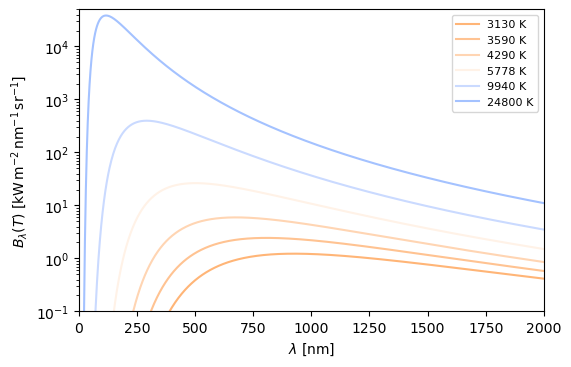

In [23]:
plt.figure(figsize=(6,4), dpi=100)

for T in T_sample:
    # get RGB color corresponding to temperature
    color = tuple([val/255 for val in convert_K_to_RGB(T)])
    
    # plot Planck spectrum (wavelength in nm, 
    # intensity in kW/m^2/nm/sr)
    plt.semilogy(1e9*wavelength, \
                 1e-12*planck_spectrum(wavelength, T), \
                 color=color, label="{:.0f} K".format(T))
    
plt.xlabel("$\lambda$ [nm]")
plt.xlim(0,1e9*lambda_max)
plt.ylabel("$B_\lambda(T)$ " + \
           "[$\mathrm{kW\,m^{-2}\,nm^{-1}\, sr^{-1}}$]")
plt.ylim(0.1,5e4)
plt.legend(loc="upper right", fontsize=8)
plt.savefig("planck_spectrum.pdf")

#### Wien displacement law and bisection algorithm

In [24]:
import numpy as np

In [25]:
def root_bisection(f, a, b, eps=1e-3, verbose=False):
    """
    bisection algorithm for finding the root of a function f(x)

    args: f - function f(x) 
          a - left endpoint of start interval
          b - right endpoint of start interval
          eps - tolerance
          verbose - print additiontal information if true

    returns: estimate of x for which f(x) = 0
    """
    i = 0 # counter of number of iterations
    
    # iterate while separation of endpoints is greater than tolerance
    while abs(b-a) > eps:
        
        if verbose:
            print(f"{a:6.3f} {f(a):10.3e}",
                  f"{b:6.3f} {f(b):10.3e}")

        # new midpoint
        x = 0.5*(a+b)

        # determine which subinterval contains midpoint 
        # and reset endpoint
        if f(a)*f(x) < 0:
            b = x
        else:
            a = x

        # increment counter
        i += 1
    
    print("tolerance reached after {:d} iterations".format(i)) 
    print("deviation: f(x) = {:.3e}".format(f(x)))    

    return x

In [26]:
def quadratic(x):
    return x**2 - x - 2

In [27]:
root_bisection(quadratic, 0, 5, verbose=True)

 0.000 -2.000e+00  5.000  1.800e+01
 0.000 -2.000e+00  2.500  1.750e+00
 1.250 -1.688e+00  2.500  1.750e+00
 1.875 -3.594e-01  2.500  1.750e+00
 1.875 -3.594e-01  2.188  5.977e-01
 1.875 -3.594e-01  2.031  9.473e-02
 1.953 -1.384e-01  2.031  9.473e-02
 1.992 -2.338e-02  2.031  9.473e-02
 1.992 -2.338e-02  2.012  3.529e-02
 1.992 -2.338e-02  2.002  5.863e-03
 1.997 -8.780e-03  2.002  5.863e-03
 2.000 -1.465e-03  2.002  5.863e-03
 2.000 -1.465e-03  2.001  2.198e-03
tolerance reached after 13 iterations
deviation: f(x) = 3.662e-04


2.0001220703125

In [28]:
root_bisection(quadratic, -2, 0, verbose=True)

-2.000  4.000e+00  0.000 -2.000e+00
-1.000  0.000e+00  0.000 -2.000e+00
-0.500 -1.250e+00  0.000 -2.000e+00
-0.250 -1.688e+00  0.000 -2.000e+00
-0.125 -1.859e+00  0.000 -2.000e+00
-0.062 -1.934e+00  0.000 -2.000e+00
-0.031 -1.968e+00  0.000 -2.000e+00
-0.016 -1.984e+00  0.000 -2.000e+00
-0.008 -1.992e+00  0.000 -2.000e+00
-0.004 -1.996e+00  0.000 -2.000e+00
-0.002 -1.998e+00  0.000 -2.000e+00
tolerance reached after 11 iterations
deviation: f(x) = -1.999e+00


-0.0009765625

In [29]:
def root_bisection(f, a, b, eps=1e-3, verbose=False):
    """
    improved bisection algorithm for finding the root of a function f(x)

    args: f - function f(x) 
          a - left endpoint of start interval
          b - right endpoint of start interval
          eps - tolerance
          verbose - print additiontal information if true

    returns: estimate of x for which f(x) = 0
    """
    i = 0 # counter of number of iterations
    
    # iterate while separation of endpoints is greater than tolerance
    while abs(b-a) > eps:
        
        if verbose:
            print(f"{a:6.3f} {f(a):10.3e}",
                  f"{b:6.3f} {f(b):10.3e}")

        # new midpoint
        x = 0.5*(a+b)

        # check if function crosses zero in left subinterval 
        # and reset endpoint  unless x is exact solution
        if f(x) == 0:
            print("found exact solution " + \
                  "after {:d} iteration(s)".format(i+1))
            return x
        elif f(a)*f(x) < 0:
            b = x
        else:
            a = x

        # increment counter
        i += 1
    
    print("tolerance reached after {:d} iterations".format(i)) 
    print("deviation: f(x) = {:.3e}".format(f(x)))    

    return x

In [30]:
root_bisection(quadratic, 0, 5)

tolerance reached after 13 iterations
deviation: f(x) = 3.662e-04


2.0001220703125

In [31]:
root_bisection(quadratic, -2, 0)

found exact solution after 1 iteration(s)


-1.0

In [32]:
root_bisection(quadratic, 0, 5, 1e-6)

tolerance reached after 23 iterations
deviation: f(x) = -3.576e-07


1.9999998807907104

In [33]:
root_bisection(quadratic, -5, 5)

tolerance reached after 14 iterations
deviation: f(x) = 1.099e-03


-1.0003662109375

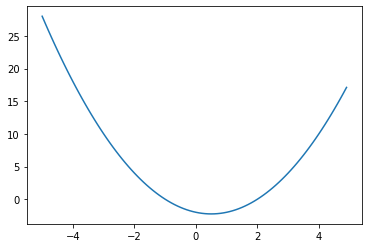

In [34]:
x = np.arange(-5,5,0.1)
plt.plot(x, quadratic(x))

In [35]:
def root_bisection(f, a, b, roots, eps=1e-3):
    """
    recursive bisection algorithm for finding multiple roots
    of a function f(x)

    args: f - function f(x) 
          a - left endpoint of start interval
          b - right endpoint of start interval
          roots - numpy array of roots
          eps - tolerance
      
    returns: estimate of x for which f(x) = 0
    """    
    # midpoint
    x = 0.5*(a+b)
        
    # break recursion if x is an exact solution
    if f(x) == 0:
        roots = np.append(roots, x)
        print("found {:d}. solution (exact)".
              format(len(roots)))
    # break recursion if tolerance is reached
    elif abs(b-a) <= eps:
        roots = np.append(roots, x)
        print("found {:d}. solution,".format(len(roots)),
              "deviation f(x) = {:6e}".format(f(x)))
    # continue recursion if function crosses zero
    # in any subinterval
    else:
        if f(a)*f(x) <= 0:
            roots = root_bisection(f, a, x, roots, eps)
        if f(x)*f(b) <= 0:
            roots = root_bisection(f, x, b, roots, eps)
        
    return roots

In [36]:
x0 = root_bisection(quadratic, -2, 0, [])
print(x0)

found 1. solution (exact)
[-1.]


In [37]:
x0 = root_bisection(quadratic, 0, 5, x0)
print(x0)

found 2. solution, deviation f(x) = -5.492829e-04
[-1.          1.99981689]


In [38]:
x0 = root_bisection(quadratic, -5, 5, [])
print(x0)

found 1. solution, deviation f(x) = 1.831092e-04
found 2. solution, deviation f(x) = -5.492829e-04
[-1.00006104  1.99981689]


In [39]:
def f(x):
    return (x-5)*np.exp(x) + 5

In [40]:
x0 = root_bisection(f, 0, 10, [])
print(x0)

found 1. solution, deviation f(x) = -1.220843e-03
found 2. solution, deviation f(x) = -2.896551e-02
[3.05175781e-04 4.96490479e+00]


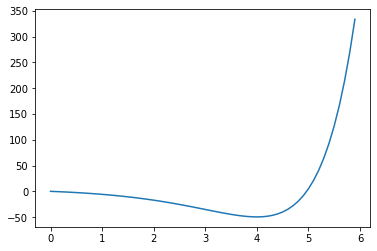

In [41]:
x = np.arange(0,6,0.1)
plt.plot(x, f(x))

In [42]:
x0 = root_bisection(f, 0, 10, [], eps=1e-6)
print(x0)

found 1. solution, deviation f(x) = -1.192093e-06
found 2. solution, deviation f(x) = 8.816604e-06
[2.98023224e-07 4.96511430e+00]


In [43]:
from scipy.constants import Wien

print("T [K]   maximum [nm]")
print("       scipy   bisect")
for T in T_sample:
    print("{:>5.0f}  {:.2f}  {:.2f}".format(T, 1e9*Wien/T, 1e9*h*c/(x0[1]*k*T)))

T [K]   maximum [nm]
       scipy   bisect
 3130  925.81  925.81
 3590  807.18  807.18
 4290  675.47  675.47
 5778  501.52  501.52
 9940  291.53  291.53
24800  116.85  116.85


## Physics of stellar atmospheres

### Thermal excitation and ionization

In [44]:
import numpy as np
from scipy.constants import k, h, m_e, physical_constants

# ionization energy of hydrogen
chi = physical_constants['Rydberg constant times hc in J'][0]

Fraction of neutral hydrogen in first excited state

In [45]:
# energy levels
n1, n2 = 1, 2

print("T [K]  N2/N1")
for T in T_sample:
    print("{:5.0f}  {:.3e}".format(T,
        (n2/n1)**2 * np.exp(chi*(1/n2**2 - 1/n1**2)/(k*T))))

T [K]  N2/N1
 3130  1.485e-16
 3590  1.892e-14
 4290  4.115e-12
 5778  5.030e-09
 9940  2.681e-05
24800  3.376e-02


In [46]:
def HII_frac(T, P_e):
    """
    computes fraction of ionized hydrogen 
    using the Saha equation

    args: T - temperature in K
          P_e - electron pressure in Pa

    returns: HII fraction
    """
    E_therm = k*T
    
    return (E_therm/P_e) * (2*np.pi*m_e*E_therm/h**2)**(3/2) * np.exp(-chi/E_therm)

Compute and plot fraction of hydrogen in first excited state relative to all hydrogen

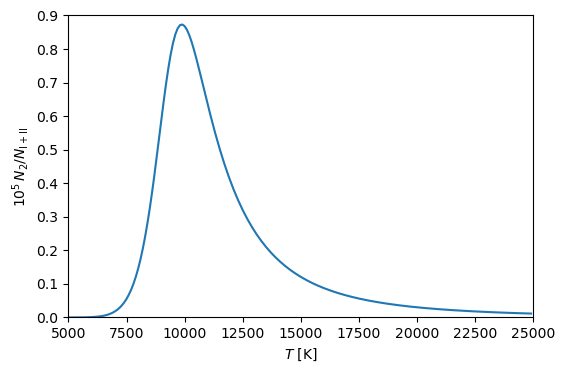

In [47]:
import matplotlib.pyplot as plt

P_e = 20 # electron pressure in Pa

# temperature in K
T_min, T_max = 5e3, 25e3
T = np.arange(T_min, T_max, 100.0)

# fraction of HI in first excited state
HI2_frac = 4*np.exp(-0.75*chi/(k*T))

# plot fraction of all hydrogen in first excited state
plt.figure(figsize=(6,4), dpi=100)
plt.plot(T, 1e5*HI2_frac/((1 + HI2_frac)*(1 + HII_frac(T, P_e))))
plt.xlim(T_min, T_max)
plt.xlabel("$T$ [K]")
plt.ylim(0, 0.9)
plt.ylabel("$10^5\,N_2/N_{\mathrm{I+II}}$")
plt.savefig("hydrogen_frac.pdf")

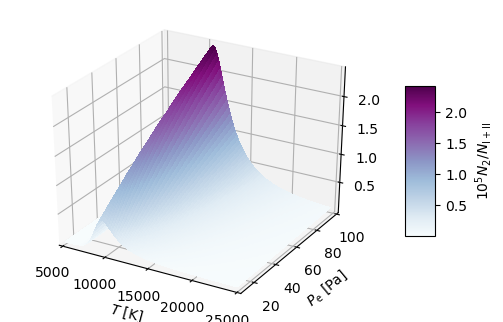

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

fig = plt.figure(figsize=(6,4), dpi=100)
ax = plt.axes(projection='3d')

P_min, P_max  = 10, 100

# create meshgrid 
# (x-axis: temperature, y-axis: electron pressure)
T, P_e = np.meshgrid(np.arange(T_min, T_max, 200.0), 
                     np.arange(P_min, P_max, 1.0))

# fraction of HI in first excited state
HI2_frac = 4*np.exp(-0.75*chi/(k*T))

# create surface plot
surf = ax.plot_surface(T, P_e, 
    1e5*HI2_frac/((1 + HI2_frac)*(1 + HII_frac(T, P_e))), 
    rcount=100, ccount=100,
    cmap='BuPu', antialiased=False)

# customize axes
ax.set_xlim(T_min, T_max)
ax.set_xlabel("$T$ [K]")
ax.xaxis.set_major_locator(LinearLocator(5))
ax.set_ylim(P_min, P_max)
ax.set_ylabel("$P_{\mathrm{e}}$ [Pa]")

# add color bar for z-axis
cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.ax.set_ylabel("$10^5 N_2/N_{\mathrm{I+II}}$")

plt.savefig("hydrogen_frac_3d.png")

### The Balmer jump

#### Numerical integration

In [49]:
import numpy as np

def integr_trapez(f, a, b, n):
    """
    numerical integration of a function f(x)
    using the trapezoidal rule

    args: f - function f(x) 
          a - left endpoint of interval
          b - right endpoint of interval
          n - number of subintervals

    returns: approximate integral
    """

    # integration step
    h = (b - a)/n
    
    # endpoints of subintervals between a+h and b-h
    x = np.linspace(a+h, b-h, n-1)
    
    return 0.5*h*(f(a) + 2*np.sum(f(x)) + f(b))

In [50]:
print(" n  integr")
for n in range(10,60,10):
    print("{:2d}  {:.6f}".format(n, integr_trapez(np.sin, 0, np.pi/2, n)))

 n  integr
10  0.997943
20  0.999486
30  0.999772
40  0.999871
50  0.999918


In [51]:
integr_trapez(np.sin, 0, np.pi/2, 0)

ZeroDivisionError: float division by zero

In [52]:
def integr_trapez(f, a, b, n):
    """
    numerical integration of a function f(x)
    using the trapezoidal rule

    args: f - function f(x) 
          a - left endpoint of interval
          b - right endpoint of interval
          n - number of subintervals

    returns: approximate integral
    """
    
    # integration step with exception handling
    try:
        h = (b - a)/n
    except ZeroDivisionError:
        print("Error: n must be non-zero")
        return None
    
    # endpoints of subintervals between a+h and b-h
    x = np.linspace(a+h, b-h, n-1)
    
    return 0.5*h*(f(a) + 2*np.sum(f(x)) + f(b))

In [53]:
print(" n  integr")
for n in range(0,60,10):
    print("{:2d}".format(n), end="  ")
    
    intgr = integr_trapez(np.sin, 0, np.pi/2, n)
    
    if intgr != None:
        print("{:.6f}".format(intgr))

 n  integr
 0  Error: n must be non-zero
10  0.997943
20  0.999486
30  0.999772
40  0.999871
50  0.999918


In [54]:
def integr_trapez(f, a, b, n):
    """
    numerical integration of a function f(x)
    using the trapezoidal rule

    args: f - function f(x) 
          a - left endpoint of interval
          b - right endpoint of interval
          n - number of subintervals

    returns: approximate integral
    """
    n = int(n)
    
    # integration step with exception handling
    try:
        if n > 0:
            h = (b - a)/n
        else:
            raise ValueError
    except ValueError:
        print("Invalid argument: n must be positive")
        return None
    
    # endpoints of subintervals between a+h and b-h
    x = np.linspace(a+h, b-h, n-1)
    
    return 0.5*h*(f(a) + 2*np.sum(f(x)) + f(b))

In [55]:
integr_trapez(np.sin, 0, np.pi/2, -1)

Invalid argument: n must be positive


In [56]:
integr_trapez(np.sin, 0, np.pi/2, 5.5)

0.9917617687547272

In [57]:
def integr_simpson(f, a, b, n):
    """
    numerical integration of a function f(x)
    using Simpson's rule

    args: f - function f(x) 
          a - left endpoint of interval
          b - right endpoint of interval
          n - number of subintervals (positive even integer)

    returns: approximate integral
    """
    
    # need even number of subintervals
    n = max(2, 2*int(n/2))
    
    # integration step
    h = (b - a)/n
    
    # endpoints of subintervals (even and odd multiples of h)
    x_even = np.linspace(a+2*h, b-2*h, int(n/2-1))
    x_odd  = np.linspace(a+h, b-h, int(n/2))
    
    return (h/3)*(f(a) + 2*np.sum(f(x_even)) + 4*np.sum(f(x_odd)) + f(b))

In [58]:
print(" n  integr")
for n in range(2,12,2):
    print("{:2d}  {:.8f}".format(n, integr_simpson(np.sin, 0, np.pi/2, n)))

 n  integr
 2  1.00227988
 4  1.00013458
 6  1.00002631
 8  1.00000830
10  1.00000339


#### Integration of the Planck function

In [59]:
np.exp(1e3)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

Logarithm of the largest float number

In [60]:
import sys

np.log(sys.float_info.max)

709.782712893384

In [61]:
def planck_spectrum(wavelength, T):
    """
    function computes Planck spectrum of a black body
    uses cutoff of exponent to avoid overflow

    args: numpy arrays
          wavelength - wavelength in m
          T - temperature in K 

    returns: intensity in W/m^2/m/sr
    """    
    return 2*h*c**2 / (wavelength**5 * 
        (np.exp(np.minimum(700, h*c/(wavelength*k*T))) - 1))

Fraction of photons above $\lambda = 364.7\;{\rm nm}$ (Balmer jump)

In [62]:
print("Teff [K] flux [%]")
for Teff in T_sample:
    frac = np.pi*integr_simpson(
        lambda x : planck_spectrum(x, Teff), 
        1e-9, 364.7e-9, 100) / (sigma * Teff**4)
    print("{:5.0f}    {:5.2f}".format(Teff, 100*frac))

Teff [K] flux [%]
 3130     0.13
 3590     0.46
 4290     1.71
 5778     8.43
 9940    40.87
24800    89.12


## Planetary ephemerides with VSOP87

In [63]:
# local module in file vsop87.py
import vsop87

In [64]:
import math

def Julian_date(D, M, Y, UT):
    """
    converts day, month, year, and universal time into
    Julian date

    args: D - day 
          M - month
          Y - year
          UT - universal time

    returns: Julian date
    """
    
    if (M <= 2):
        y = Y-1
        m = M+12
    else:
        y = Y
        m = M
        
    if (Y < 1582):
        B = -2
    elif (Y == 1582):
        if (M < 10):
            B = -2
        elif (M == 10):
            if (D <= 4):
                B=-2
            else:
                B = math.floor(y/400) - math.floor(y/100)
        else:
            B = math.floor(y/400) - math.floor(y/100)
    else:
        B = math.floor(y/400) - math.floor(y/100)

    return math.floor(365.25*y) + math.floor(30.6001*(m+1)) + B + 1720996.5 + D + UT/24

Use module ```datetime``` to obtain date and UTC now

In [65]:
from datetime import datetime

# get date and UTC now
now = datetime.utcnow()

JD = Julian_date(now.day, now.month, now.year, 
                 now.hour + now.minute/60 + now.second/3600)

# convert to Julian date
print("Julian date: {:.4f}".format(JD))

Julian date: 2459587.7571


In [66]:
def Earth_Mars_dist(JD):
    delta_x = vsop87.Earth_X(JD) - vsop87.Mars_X(JD)
    delta_y = vsop87.Earth_Y(JD) - vsop87.Mars_Y(JD)
    delta_z = vsop87.Earth_Z(JD) - vsop87.Mars_Z(JD)
    return vsop87.np.sqrt(delta_x**2 + delta_y**2 + delta_z**2)

In [67]:
print("distance between Earth and Mars now: {:.3f} AU".format(
    Earth_Mars_dist(JD)))

distance between Earth and Mars now: 2.302 AU


Julian dates for next 1000 days

Text(0, 0.5, '$d$ [AU]')

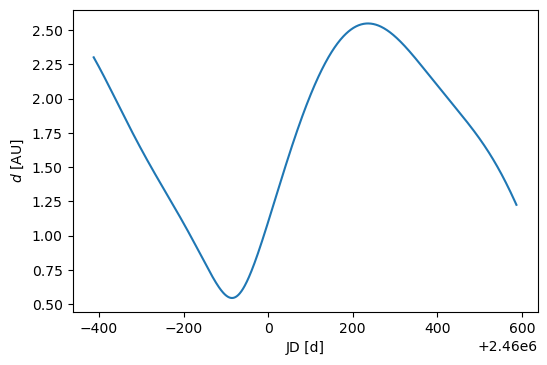

In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = JD + np.arange(1000)

plt.figure(figsize=(6,4), dpi=100)
plt.plot(t, Earth_Mars_dist(t))
plt.xlabel("JD [d]")
plt.ylabel("$d$ [AU]" )

#### Centered difference method

In [69]:
import numpy as np

In [70]:
def derv_center2(f, x, h):
    """
    approximates derivative of a function
    by second-order centered differences

    args: f - function f(x) 
          x - points for which df/dx is computed
          h - backward/forward difference

    returns: approximation of df/dx
    """
    return (f(x+h) - f(x-h))/(2*h)

Test: derivative of $\sin(x)$

In [71]:
h = 0.1
x = np.linspace(0, np.pi, 9)

print(" analytic    cd2")
for (exact,approx) in zip(np.cos(x), 
                          derv_center2(np.sin, x, h)):
    print("{:9.6f} {:9.6f}".format(exact,approx))

 analytic    cd2
 1.000000  0.998334
 0.923880  0.922341
 0.707107  0.705929
 0.382683  0.382046
 0.000000  0.000000
-0.382683 -0.382046
-0.707107 -0.705929
-0.923880 -0.922341
-1.000000 -0.998334


In [72]:
def dderv_center2(f, x, h):
    """
    approximates second derivative of a function
    by second-order centered differences

    args: f - function f(x) 
          x - points for which df/dx is computed
          h - backward/forward difference

    returns: approximation of d^2 f/dx^2
    """
    return (f(x+h) - 2*f(x) + f(x-h))/h**2

In [73]:
print(" 1st derv  2nd derv")
for (derv,dderv) in zip(derv_center2(np.sin, x, h),
                        dderv_center2(np.sin, x, h)):
    print("{:9.6f} {:9.6f}".format(derv,dderv))

 1st derv  2nd derv
 0.998334  0.000000
 0.922341 -0.382365
 0.705929 -0.706518
 0.382046 -0.923110
 0.000000 -0.999167
-0.382046 -0.923110
-0.705929 -0.706518
-0.922341 -0.382365
-0.998334  0.000000


#### Newton–Raphson method

In [74]:
def root_newton(f, df, x0, eps=1e-3, imax=100):
    """
    Newton–Raphson algorithm for finding the root of a function f(x)

    args: f - function f(x) 
          df - derivative df/dx
          x0 - start point of iteration
          eps - tolerance
          imax - maximal number of iterations
          verbose - print additiontal information if true

    returns: estimate of x for which f(x) = 0
    """
    
    for i in range(imax):
        x = x0 - f(x0)/df(x0)
        
        if abs(x - x0) < eps:
            print("tolerance reached after {:d} iterations".format(i+1)) 
            print("deviation: f(x) = {:.3e}".format(f(x)))
            return x

        x0 = x  

    print("exceeded {:d} iterations".format(i+1), "without reaching tolerance") 
    return x

In [75]:
def quadratic(x):
    return x**2 - x - 2

In [76]:
root_newton(quadratic, lambda x: 2*x - 1, 0)

tolerance reached after 5 iterations
deviation: f(x) = 2.095e-09


-1.000000000698492

In [77]:
root_newton(quadratic, lambda x: 2*x - 1, 10)

tolerance reached after 6 iterations
deviation: f(x) = 1.267e-08


2.0000000042242396

#### Minimal distance of Earth to Mars

Find time $t$ for which $\dot{d}=0$ by applying the Newton-Raphson method to $\dot{d}$.

Depending on the current Julian date, you will need to set a start point given by ```JD``` plus a certain number of days to obtain the next minimum of $d$.

In [78]:
delta_t = 0.1

JD_extrem = root_newton(
    lambda t : derv_center2(Earth_Mars_dist, t, delta_t),
    lambda t : dderv_center2(Earth_Mars_dist, t, delta_t),
    JD, eps=delta_t)

print("\ndistance = {1:.3f} AU in {0:.0f} days".format(
        JD_extrem-JD, Earth_Mars_dist(JD_extrem)),
    "({:4.0f}-{:02.0f}-{:02.0f})".format(
        vsop87.JD_year(JD_extrem), 
        vsop87.JD_month(JD_extrem), 
        vsop87.JD_day(JD_extrem)))

tolerance reached after 4 iterations
deviation: f(x) = 3.192e-10

distance = 2.638 AU in -110 days (2021-09-20)


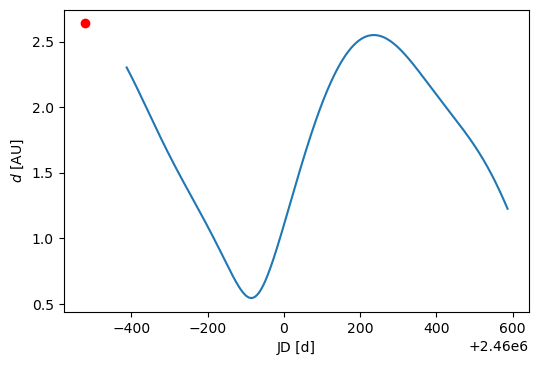

In [79]:
plt.figure(figsize=(6,4), dpi=100)
plt.plot(t, Earth_Mars_dist(t))
plt.plot([JD_extrem], [Earth_Mars_dist(JD_extrem)], 'ro')
plt.xlabel("JD [d]")
plt.ylabel("$d$ [AU]" )
plt.savefig("Earth_Mars_distance.pdf")

Check second derivative: $\ddot{d}>0$ for a minimum

In [80]:
dderv_center2(Earth_Mars_dist, JD_extrem, delta_t)

-6.171212318939466e-05